# Análise da recorrência por cliente

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy import stats

In [162]:
all_orders = pd.read_csv('../datasets/trusted/all_orders.csv', index_col=0)
all_orders.count()

order_id                         99441
customer_unique_id               99441
customer_city                    99441
customer_state                   99441
order_approved_at                99281
order_purchase_timestamp         99441
order_estimated_delivery_date    99441
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
dtype: int64

In [163]:
times_bought = all_orders.groupby(['customer_unique_id']).agg('count')['order_id'].sort_values(ascending=False)
times_bought.head(10)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
dc813062e0fc23409cd255f7f53c7074     6
de34b16117594161a6a89c50b289d35a     6
f0e310a6839dce9de1638e0fe5ab282a     6
Name: order_id, dtype: int64

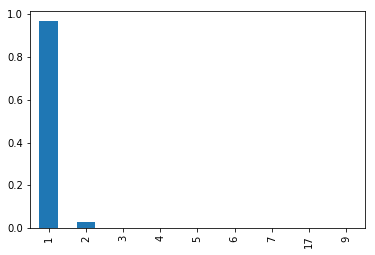

In [164]:
times_bought.value_counts(normalize=True).plot.bar()

Como é possível observar com o gráfico, a grande maioria dos clientes compra apenas uma vez.

In [165]:
more_than_once = all_orders.loc[np.where(times_bought > 1)]
more_than_once.count()

order_id                         2997
customer_unique_id               2997
customer_city                    2997
customer_state                   2997
order_approved_at                2992
order_purchase_timestamp         2997
order_estimated_delivery_date    2997
order_delivered_carrier_date     2953
order_delivered_customer_date    2917
dtype: int64

In [166]:
more_than_once.to_csv("../datasets/trusted/more_than_once.csv")